In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import(accuracy_score,classification_report,confusion_matrix,roc_auc_score)

In [43]:
df=pd.read_csv(r'C:\Users\Dell\Downloads\.ipynb_checkpoints\fraudTest.csv')

In [44]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [46]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [47]:
df.duplicated().any()

np.False_

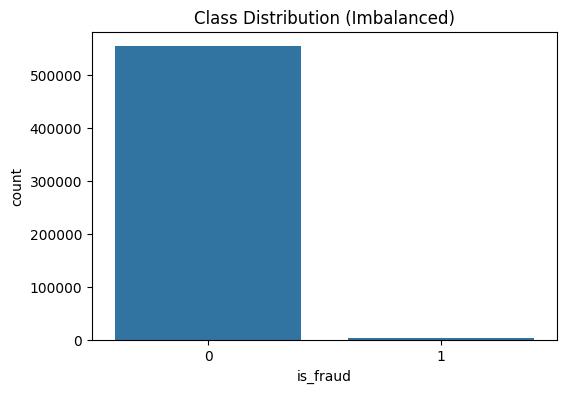

In [48]:
#  Exploratory Data Analysis
plt.figure(figsize=(6,4))
sns.countplot(x="is_fraud", data=df)
plt.title("Class Distribution (Imbalanced)")
plt.show()


In [49]:
print(df['is_fraud'].value_counts())  # 0 = Legitimate, 1 = Fraud


is_fraud
0    553574
1      2145
Name: count, dtype: int64


In [50]:
#  Convert transaction datetime 
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_dayofweek'] = df['trans_date_trans_time'].dt.dayofweek
df['trans_month'] = df['trans_date_trans_time'].dt.month

In [51]:
# Drop raw datetime + duplicate unix_time
df = df.drop(columns=['trans_date_trans_time','unix_time'], errors="ignore")


In [52]:
#Convert dob to age
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = (pd.Timestamp.now() - df['dob']).dt.days // 365
df = df.drop(columns=['dob'], errors="ignore")


In [53]:

drop_cols = ['cc_num','first','last','street','zip','Unnamed: 0']
df = df.drop(columns=[col for col in drop_cols if col in df.columns], errors="ignore")


In [54]:
#encoding categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))


In [55]:
#divide data into X,y variable
X = df.drop("is_fraud", axis=1)
y = df["is_fraud"]

In [56]:
#split data as Train-Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [57]:
df.head()

,merchant,category,amt,gender,city,state,lat,long,city_pop,job,trans_num,merch_lat,merch_long,is_fraud,trans_hour,trans_dayofweek,trans_month,age
0,319,10,2.86,1,157,39,33.9659,-80.9355,333497,275,98699,33.986391,-81.200714,0,12,6,6,57
1,591,10,29.84,0,16,43,40.3207,-110.4360,302,392,108785,39.450498,-109.960431,0,12,6,6,35
2,611,5,41.28,0,61,33,40.6729,-73.5365,34496,259,433979,40.495810,-74.196111,0,12,6,6,54
3,222,9,60.05,1,764,8,28.5697,-80.8191,54767,407,71993,28.812398,-80.883061,0,12,6,6,38
4,292,13,3.19,1,247,21,44.2529,-85.0170,1126,196,190585,44.959148,-85.884734,0,12,6,6,70


In [58]:
#Feature Scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
#Handle Imbalance with SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())


Before SMOTE: is_fraud
0    442859
1      1716
Name: count, dtype: int64
After SMOTE: is_fraud
0    442859
1    442859
Name: count, dtype: int64


In [60]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    print(f"\nModel: {model.__class__.__name__}")
    print("Accuracy:", round(acc,4))
    print("ROC-AUC:", round(roc,4))
    print(classification_report(y_test, y_pred, digits=4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, label=f"{model.__class__.__name__} (AUC={roc:.2f})")


In [61]:
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>


Model: LogisticRegression
Accuracy: 0.9344
ROC-AUC: 0.8428
              precision    recall  f1-score   support

           0     0.9990    0.9351    0.9660    110715
           1     0.0429    0.7506    0.0811       429

    accuracy                         0.9344    111144
   macro avg     0.5209    0.8428    0.5235    111144
weighted avg     0.9953    0.9344    0.9625    111144

Confusion Matrix:
 [[103526   7189]
 [   107    322]]


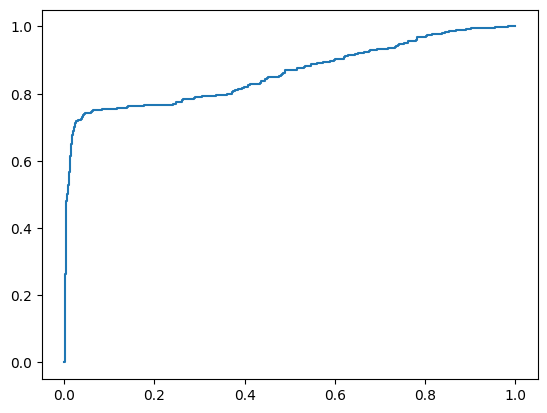

In [63]:
# Logistic Regression
from sklearn.metrics import roc_curve

lr = LogisticRegression(max_iter=1000, solver="liblinear")
evaluate_model(lr, X_train_res, y_train_res, X_test, y_test)



Model: DecisionTreeClassifier
Accuracy: 0.9522
ROC-AUC: 0.9296
              precision    recall  f1-score   support

           0     0.9996    0.9524    0.9754    110715
           1     0.0687    0.9068    0.1277       429

    accuracy                         0.9522    111144
   macro avg     0.5342    0.9296    0.5516    111144
weighted avg     0.9960    0.9522    0.9721    111144

Confusion Matrix:
 [[105440   5275]
 [    40    389]]


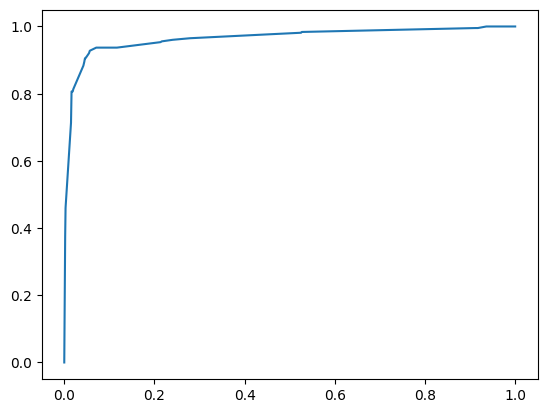

In [64]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=6, random_state=42)
evaluate_model(dt, X_train_res, y_train_res, X_test, y_test)


In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=42)
evaluate_model(rf, X_train_res, y_train_res, X_test, y_test)


In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Fraud Detection")
plt.legend()
plt.show()